In [1]:
# Import libraries
import pandas as pd
import numpy as np
import keras
np.random.seed(2)

In [2]:
#np.random.seed(2)
#What if every time you start training from scratch the model is initialised to the same set of random initialise weights? In this case your model could become reproducible.
# This is achieved by numpy.random.seed(0).
 #By mentioning seed() to a particular number, you are hanging on to same set of random numbers alway

In [3]:
# import data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/creditcard.csv.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [7]:
df=pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#### Pre-Processing the data

In [9]:
from sklearn.preprocessing import StandardScaler
df['normalizeAmount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df=df.drop(['Amount'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             284807 non-null  float64
 1   V1               284807 non-null  float64
 2   V2               284807 non-null  float64
 3   V3               284807 non-null  float64
 4   V4               284807 non-null  float64
 5   V5               284807 non-null  float64
 6   V6               284807 non-null  float64
 7   V7               284807 non-null  float64
 8   V8               284807 non-null  float64
 9   V9               284807 non-null  float64
 10  V10              284807 non-null  float64
 11  V11              284807 non-null  float64
 12  V12              284807 non-null  float64
 13  V13              284807 non-null  float64
 14  V14              284807 non-null  float64
 15  V15              284807 non-null  float64
 16  V16              284807 non-null  floa

In [11]:
# drop time
df=df.drop(['Time'],axis=1)

In [12]:
# is null value present
df.isna().sum()

V1                 0
V2                 0
V3                 0
V4                 0
V5                 0
V6                 0
V7                 0
V8                 0
V9                 0
V10                0
V11                0
V12                0
V13                0
V14                0
V15                0
V16                0
V17                0
V18                0
V19                0
V20                0
V21                0
V22                0
V23                0
V24                0
V25                0
V26                0
V27                0
V28                0
Class              0
normalizeAmount    0
dtype: int64

In [13]:
#Descriptive Statistics
#The table below shows the descriptive statistics of the variables of this dataset.
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') 


set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(df.describe().T)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


SUMMARY STATISTICS OF NUMERIC COLUMNS

                    count      mean   std     min   25%       50%   75%     max
V1               284807.0  3.92e-15  1.96  -56.41 -0.92  1.81e-02  1.32    2.45
V2               284807.0  5.69e-16  1.65  -72.72 -0.60  6.55e-02  0.80   22.06
V3               284807.0 -8.77e-15  1.52  -48.33 -0.89  1.80e-01  1.03    9.38
V4               284807.0  2.78e-15  1.42   -5.68 -0.85 -1.98e-02  0.74   16.88
V5               284807.0 -1.55e-15  1.38 -113.74 -0.69 -5.43e-02  0.61   34.80
V6               284807.0  2.01e-15  1.33  -26.16 -0.77 -2.74e-01  0.40   73.30
V7               284807.0 -1.69e-15  1.24  -43.56 -0.55  4.01e-02  0.57  120.59
V8               284807.0 -1.93e-16  1.19  -73.22 -0.21  2.24e-02  0.33   20.01
V9               284807.0 -3.14e-15  1.10  -13.43 -0.64 -5.14e-02  0.60   15.59
V10              284807.0  1.77e-15  1.09  -24.59 -0.54 -9.29e-02  0.45   23.75
V11              284807.0  9.17e-16  1.02   -4.80 -0.76 -3.28e-02  0.74   12.02
V

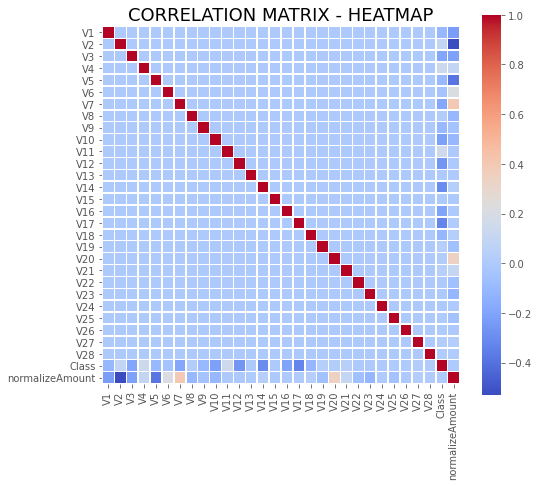

In [14]:
#  looking at correlations matrix, defined via Pearson function  
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [15]:
x=df.iloc[:,df.columns!='Class']
y=df.iloc[:,df.columns == 'Class']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=0)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(199364, 29)
(199364, 1)
(85443, 1)
(85443, 29)


In [18]:
#### DEEP NEURAL NETWORK
from keras.models import  Sequential
from keras.layers import Dense, Dropout


In [19]:
model=Sequential([
                  Dense(units=16,input_dim=29,activation='relu'),
                  Dense(units=20,activation='relu'),
                  Dropout(0.5),
                  Dense(20,activation='relu'),
                  Dense(24,activation='relu'),
                  Dense(1,activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                340       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,769
Trainable params: 1,769
Non-trainable params: 0
______________________________________________________

In [21]:
# Training our model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=10)

Epoch 1/10
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0091 - accuracy: 0.9986
Epoch 2/10
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/10
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 4/10
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 5/10
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 6/10
13291/13291 [==============================] - 17s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 7/10
13291/13291 [==============================] - 17s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 8/10
13291/13291 [==============================] - 17s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 9/10
13291/13291 [==============================] - 17s 1ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 10/10
13291/13291 [==============================

In [23]:
score=model.evaluate(x_test,y_test)

2671/2671 [==============================] - 3s 944us/step - loss: 0.0037 - accuracy: 0.9994


In [24]:
print(score)

[0.0037301445845514536, 0.9993796944618225]


In [25]:
y_pred=model.predict(x_test)
y_test=pd.DataFrame(y_test)

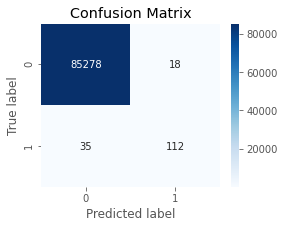

In [26]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test, y_pred.round())
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d")
          
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

In [27]:
# we use SMOTE for over sampling


#! pip install -U imbalanced-learn

In [28]:
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
x_resample, y_resample= SMOTE().fit_sample(x,y.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [30]:
x_resample=pd.DataFrame(x_resample)
y_resample=pd.DataFrame(y_resample)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.3,random_state=42)

In [32]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                340       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,769
Trainable params: 1,769
Non-trainable params: 0
______________________________________________________

In [34]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=10)

Epoch 1/10
26537/26537 [==============================] - 33s 1ms/step - loss: 0.0288 - accuracy: 0.9904
Epoch 2/10
26537/26537 [==============================] - 33s 1ms/step - loss: 0.0117 - accuracy: 0.9970
Epoch 3/10
26537/26537 [==============================] - 33s 1ms/step - loss: 0.0096 - accuracy: 0.9977
Epoch 4/10
26537/26537 [==============================] - 32s 1ms/step - loss: 0.0088 - accuracy: 0.9981
Epoch 5/10
26537/26537 [==============================] - 32s 1ms/step - loss: 0.0078 - accuracy: 0.9982
Epoch 6/10
26537/26537 [==============================] - 33s 1ms/step - loss: 0.0072 - accuracy: 0.9984
Epoch 7/10
26537/26537 [==============================] - 34s 1ms/step - loss: 0.0071 - accuracy: 0.9985
Epoch 8/10
26537/26537 [==============================] - 33s 1ms/step - loss: 0.0065 - accuracy: 0.9986
Epoch 9/10
26537/26537 [==============================] - 33s 1ms/step - loss: 0.0065 - accuracy: 0.9986
Epoch 10/10
26537/26537 [==============================

In [35]:
y_pred=model.predict(x_test)
y_expected=pd.DataFrame(y_test)

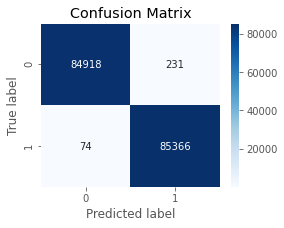

In [36]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d")
          
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");



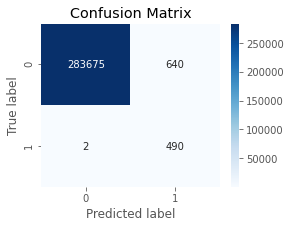

In [37]:
y_pred=model.predict(x)
y_expected=pd.DataFrame(y)

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix( y_expected,y_pred.round())
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d")
          
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");


In [51]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

In [52]:
sm = SMOTE(sampling_strategy='minority', random_state=49)
Xsm_train, ysm_train = sm.fit_sample(x,y)

NN_oversample = Sequential([Dense(Xsm_train.shape[1], input_shape=(Xsm_train.shape[1], ), activation='relu'),
                            Dense(32, activation='relu'),
                            Dense(2, activation='softmax')])
NN_oversample.summary()
              

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 29)                870       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 1,896
Trainable params: 1,896
Non-trainable params: 0
_________________________________________________________________


In [55]:
#Let's see how our performance changes when we train our NN using oversampled data.
import itertools
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
NN_oversample.compile(Adam(lr=0.001), metrics=['accuracy'], loss='sparse_categorical_crossentropy')

NN_oversample.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

oversample_pred = NN_oversample.predict_classes(x_test)

Epoch 1/20
1517/1517 - 2s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 8.5839e-04 - val_accuracy: 1.0000
Epoch 2/20
1517/1517 - 2s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 6.6427e-04 - val_accuracy: 1.0000
Epoch 3/20
1517/1517 - 2s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 7.6884e-04 - val_accuracy: 0.9999
Epoch 4/20
1517/1517 - 2s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 4.3390e-04 - val_accuracy: 1.0000
Epoch 5/20
1517/1517 - 2s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 2.0821e-04 - val_accuracy: 1.0000
Epoch 6/20
1517/1517 - 2s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 7.9360e-04 - val_accuracy: 0.9999
Epoch 7/20
1517/1517 - 2s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 2.2393e-04 - val_accuracy: 1.0000
Epoch 8/20
1517/1517 - 2s - loss: 8.6917e-04 - accuracy: 0.9998 - val_loss: 2.1116e-04 - val_accuracy: 1.0000
Epoch 9/20
1517/1517 - 2s - loss: 8.7584e-04 - accuracy: 0.9998 - val_loss: 3.6696e-04 - val_accuracy: 1.0000
Epoch 10/20
1517/1517 - 2s - loss: 0.0

In [57]:
def plot_cm(cm, classes, normalize=False, title='Confusion matrix', cmap='Blues'):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

Confusion matrix, without normalization


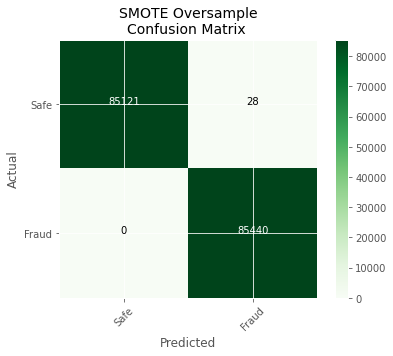

In [59]:
labels = ['Safe', 'Fraud']

oversample_smote = confusion_matrix(y_test, oversample_pred)

plt.figure(figsize=(6,5))
plot_cm(oversample_smote, labels, title="SMOTE Oversample\nConfusion Matrix ", cmap=plt.cm.Greens)

In [61]:
print(classification_report(y_test, oversample_pred, target_names=labels, digits=4))

              precision    recall  f1-score   support

        Safe     1.0000    0.9997    0.9998     85149
       Fraud     0.9997    1.0000    0.9998     85440

    accuracy                         0.9998    170589
   macro avg     0.9998    0.9998    0.9998    170589
weighted avg     0.9998    0.9998    0.9998    170589

